<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2026/blob/master/01_Introduction_to_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAE 5020 — Data-Driven Methods in Aerospace Engineering  
## Notebook 01: Python & NumPy for Engineering Workflows

by Kursat Kara with the help of ChatGPT5.2

**Instructor:** Dr. Kursat Kara  
**Term:** Spring 2026  
**Last updated:** Jan 14, 2026

### Prerequisite
Complete **Notebook 00: Colab + Python Essentials** first.

### Why this notebook exists
Notebook 00 gets you running in Colab. This notebook moves from “Python basics” to the
**numerical computing workflow** you will use throughout MAE 5020:
- represent data with **NumPy arrays**
- slice, mask, and reshape safely
- vectorize computations (avoid slow loops)
- visualize results quickly
- load a small dataset and compute basic statistics


### Learning goals
By the end of this notebook, you should be able to:
1. Explain the difference between Python lists and NumPy arrays for numerical work
2. Use indexing/slicing correctly (0-based indexing, end-exclusive slices)
3. Understand shapes (`shape`, `ndim`) and use basic reshaping
4. Use broadcasting intentionally
5. Make publication-quality quick plots with matplotlib
6. Load a small CSV-like dataset and compute mean/std
7. Debug common beginner issues (shape mismatch, indexing errors, indentation)


## 0) Setup (run once)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import io

np.set_printoptions(precision=4, suppress=True)
plt.rcParams["figure.dpi"] = 120

# Reproducible randomness when needed
rng = np.random.default_rng(0)

print("NumPy version:", np.__version__)


NumPy version: 2.0.2


## 1) Lists vs NumPy arrays (MATLAB users: this matters)
- **Python list:** flexible container (can mix types), convenient but not designed for vectorized math
- **NumPy array:** homogeneous numeric data, fast vectorized operations, foundation of scientific computing


In [2]:
lst = [1, 2, 3, 4]
arr = np.array([1, 2, 3, 4], dtype=float)

# In Python lists, + typically concatenates lists
print("lst + [1,1,1,1] ->", lst + [1, 1, 1, 1])

# In NumPy arrays, + is elementwise
print("arr + 1 ->", arr + 1)

# Elementwise math is natural in NumPy
print("arr**2 ->", arr**2)


lst + [1,1,1,1] -> [1, 2, 3, 4, 1, 1, 1, 1]
arr + 1 -> [2. 3. 4. 5.]
arr**2 -> [ 1.  4.  9. 16.]


## 2) Indexing and slicing (biggest MATLAB → Python difference)
- MATLAB is **1-based**; Python/NumPy is **0-based**
- Python slices are **end-exclusive**: `x[a:b]` returns indices `a, a+1, ..., b-1`

> If you want the first 3 elements in Python: use `x[:3]`.


In [3]:
x = np.array([10, 20, 30, 40, 50])

print("x      =", x)
print("x[0]   =", x[0])     # first element
print("x[-1]  =", x[-1])    # last element

print("x[:3]  =", x[:3])    # first 3 elements
print("x[2:]  =", x[2:])    # from index 2 to end
print("x[1:4] =", x[1:4])   # indices 1,2,3


x      = [10 20 30 40 50]
x[0]   = 10
x[-1]  = 50
x[:3]  = [10 20 30]
x[2:]  = [30 40 50]
x[1:4] = [20 30 40]


## 3) Shapes: 1D vs 2D (common source of confusion)
In MATLAB, vectors are usually 2D: `1×n` or `n×1`.  
In NumPy, a 1D vector has shape `(n,)`.

To explicitly create column/row vectors:
- column: `v[:, None]` → shape `(n,1)`
- row: `v[None, :]` → shape `(1,n)`


In [4]:
v = np.array([1, 2, 3], dtype=float)   # shape (3,)
v_col = v[:, None]                     # shape (3,1)
v_row = v[None, :]                     # shape (1,3)

print("v.shape     =", v.shape)
print("v_col.shape =", v_col.shape)
print("v_row.shape =", v_row.shape)


v.shape     = (3,)
v_col.shape = (3, 1)
v_row.shape = (1, 3)


## 4) Broadcasting (powerful and essential)
Broadcasting is NumPy’s rule for combining arrays of different shapes.

Example: outer sum using a column vector plus a row vector:
- `(n,1) + (1,n) → (n,n)`


In [6]:
x = np.arange(5.0)          # (5,)

col = x[:, None]            # (5,1)
row = x[None, :]            # (1,5)

M = col + row               # (5,5)
print("M.shape =", M.shape)
print(M)


M.shape = (5, 5)
[[0. 1. 2. 3. 4.]
 [1. 2. 3. 4. 5.]
 [2. 3. 4. 5. 6.]
 [3. 4. 5. 6. 7.]
 [4. 5. 6. 7. 8.]]


## 5) Boolean masks (logical indexing)
MATLAB: `x(x>0)`  
NumPy: `x[x>0]`


In [8]:
x = np.array([-2.0, -1.0, 0.0, 1.0, 2.0])
print("x[x>0]            ->", x[x > 0])
print("x[(x>-1)&(x<2)]   ->", x[(x > -1) & (x < 2)])


x[x>0]            -> [1. 2.]
x[(x>-1)&(x<2)]   -> [0. 1.]


## 6) Vectorization vs loops (preferred style)
Loops work, but NumPy vectorization is typically shorter, faster, and less error-prone.


In [10]:
x = np.linspace(0, 4, 5)

# Loop version
y_loop = []
for xi in x:
    y_loop.append(xi**2 + 2*xi + 1)
y_loop = np.array(y_loop)

# Vectorized version
y_vec = x**2 + 2*x + 1

print("same result?", np.allclose(y_loop, y_vec))
print("y_vec =", y_vec)


same result? True
y_vec = [ 1.  4.  9. 16. 25.]


## 7) Plotting quickstart (matplotlib)
Good habit: label axes and turn on a grid.


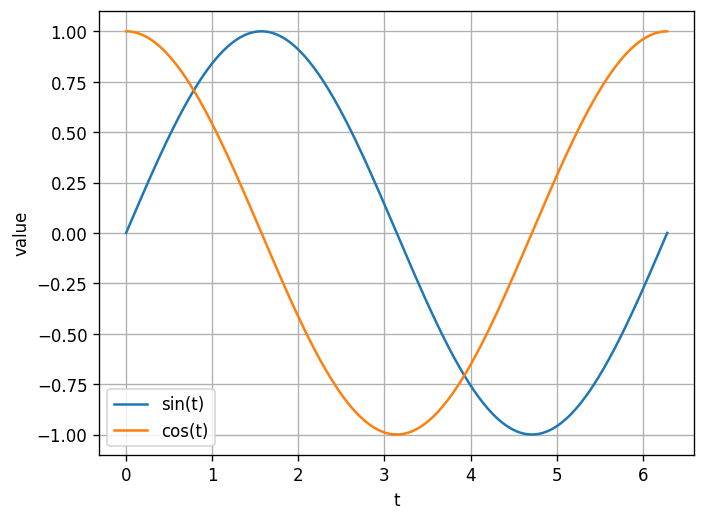

In [11]:
t = np.linspace(0, 2*np.pi, 300)
plt.figure()
plt.plot(t, np.sin(t), label="sin(t)")
plt.plot(t, np.cos(t), label="cos(t)")
plt.xlabel("t")
plt.ylabel("value")
plt.grid(True)
plt.legend()
plt.show()


## 8) Engineering example: dynamic pressure vs velocity
Dynamic pressure: \(q = \frac{1}{2}\rho V^2\)


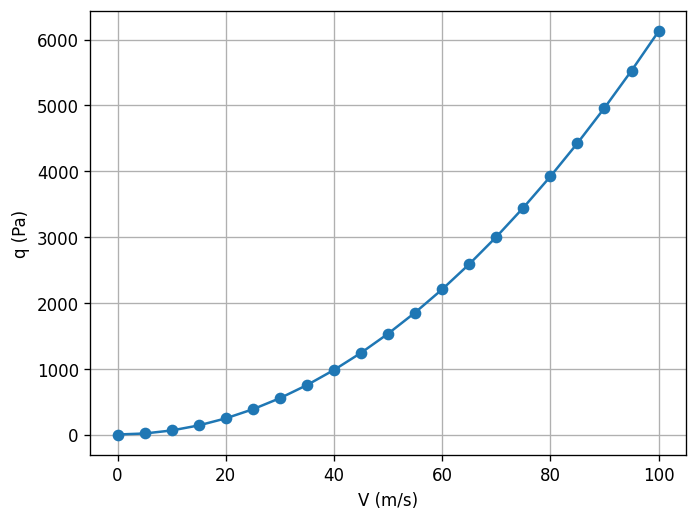

In [12]:
rho = 1.225  # kg/m^3 (sea-level)
V = np.linspace(0, 100, 21)  # m/s
q = 0.5 * rho * V**2

plt.figure()
plt.plot(V, q, "o-")
plt.xlabel("V (m/s)")
plt.ylabel("q (Pa)")
plt.grid(True)
plt.show()


## 9) Loading a tiny dataset (CSV-style) and basic stats
Real data-driven workflows start by loading data, selecting columns, and plotting.


mean(V) = 13.814285714285715
std(V)  = 2.1129983210504224


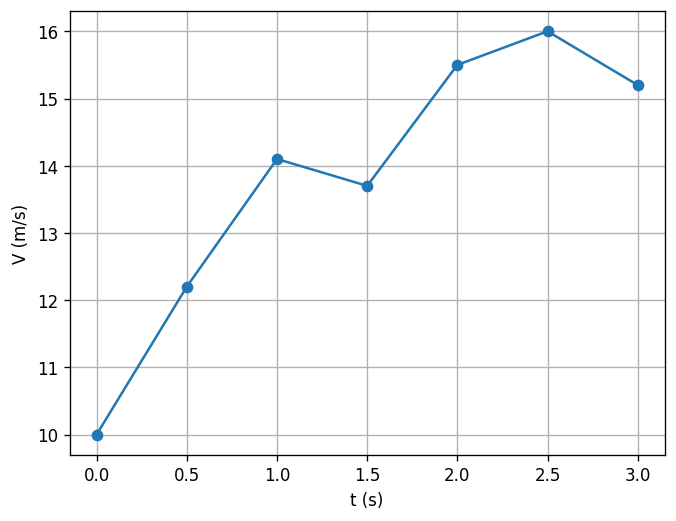

In [13]:
csv_text = """t,V
0.0,10.0
0.5,12.2
1.0,14.1
1.5,13.7
2.0,15.5
2.5,16.0
3.0,15.2
"""

data = np.genfromtxt(io.StringIO(csv_text), delimiter=",", names=True)
t_data = data["t"]
V_data = data["V"]

print("mean(V) =", V_data.mean())
print("std(V)  =", V_data.std(ddof=1))

plt.figure()
plt.plot(t_data, V_data, "o-")
plt.xlabel("t (s)")
plt.ylabel("V (m/s)")
plt.grid(True)
plt.show()


## 10) Debugging tips (read once; save time later)

### Common errors
- **IndexError:** index out of bounds
- **ValueError (shapes):** mismatched dimensions in operations
- **IndentationError:** Python uses indentation to define blocks

### Practical habits
- Print shapes: `print(A.shape)`
- Use small test arrays first
- If a cell behaves strangely: restart runtime and run all


In [14]:
# Example: shape mismatch (uncomment to see the error)
A = np.ones((3,2))
b = np.ones((3,))
print("A.shape =", A.shape, "b.shape =", b.shape)

# This will error because shapes (3,2) and (3,) are not compatible in this operation:
# A + b

# Fix depends on intent. Example: add b as a column vector (3,1) so it broadcasts across columns:
b_col = b[:, None]  # (3,1)
print("A + b_col -> shape", (A + b_col).shape)


A.shape = (3, 2) b.shape = (3,)
A + b_col -> shape (3, 2)


## Scintific Plotting

SciencePlots repo has Matplotlib styles to format your figures for scientific papers, presentations and theses.

https://github.com/garrettj403/SciencePlots


In [15]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')

ModuleNotFoundError: No module named 'scienceplots'

In [16]:
pip install SciencePlots


In [17]:
import matplotlib.pyplot as plt
import scienceplots

In [20]:
plt.style.use(["science"])

def model(x, p):
    return x ** (2 * p + 1) / (1 + x ** (2 * p))

pparam = dict(xlabel="Voltage (mV)", ylabel=r"Current ($\mu$A)")

x = np.linspace(0.75, 1.25, 201)

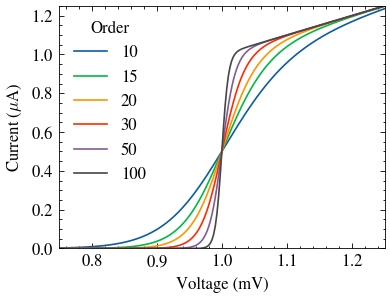

In [25]:
# Styles 'science', 'no-latex'
with plt.style.context(["science","no-latex"]):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title="Order")
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig("fig01.jpg", dpi=300)
    plt.show()
    plt.close()

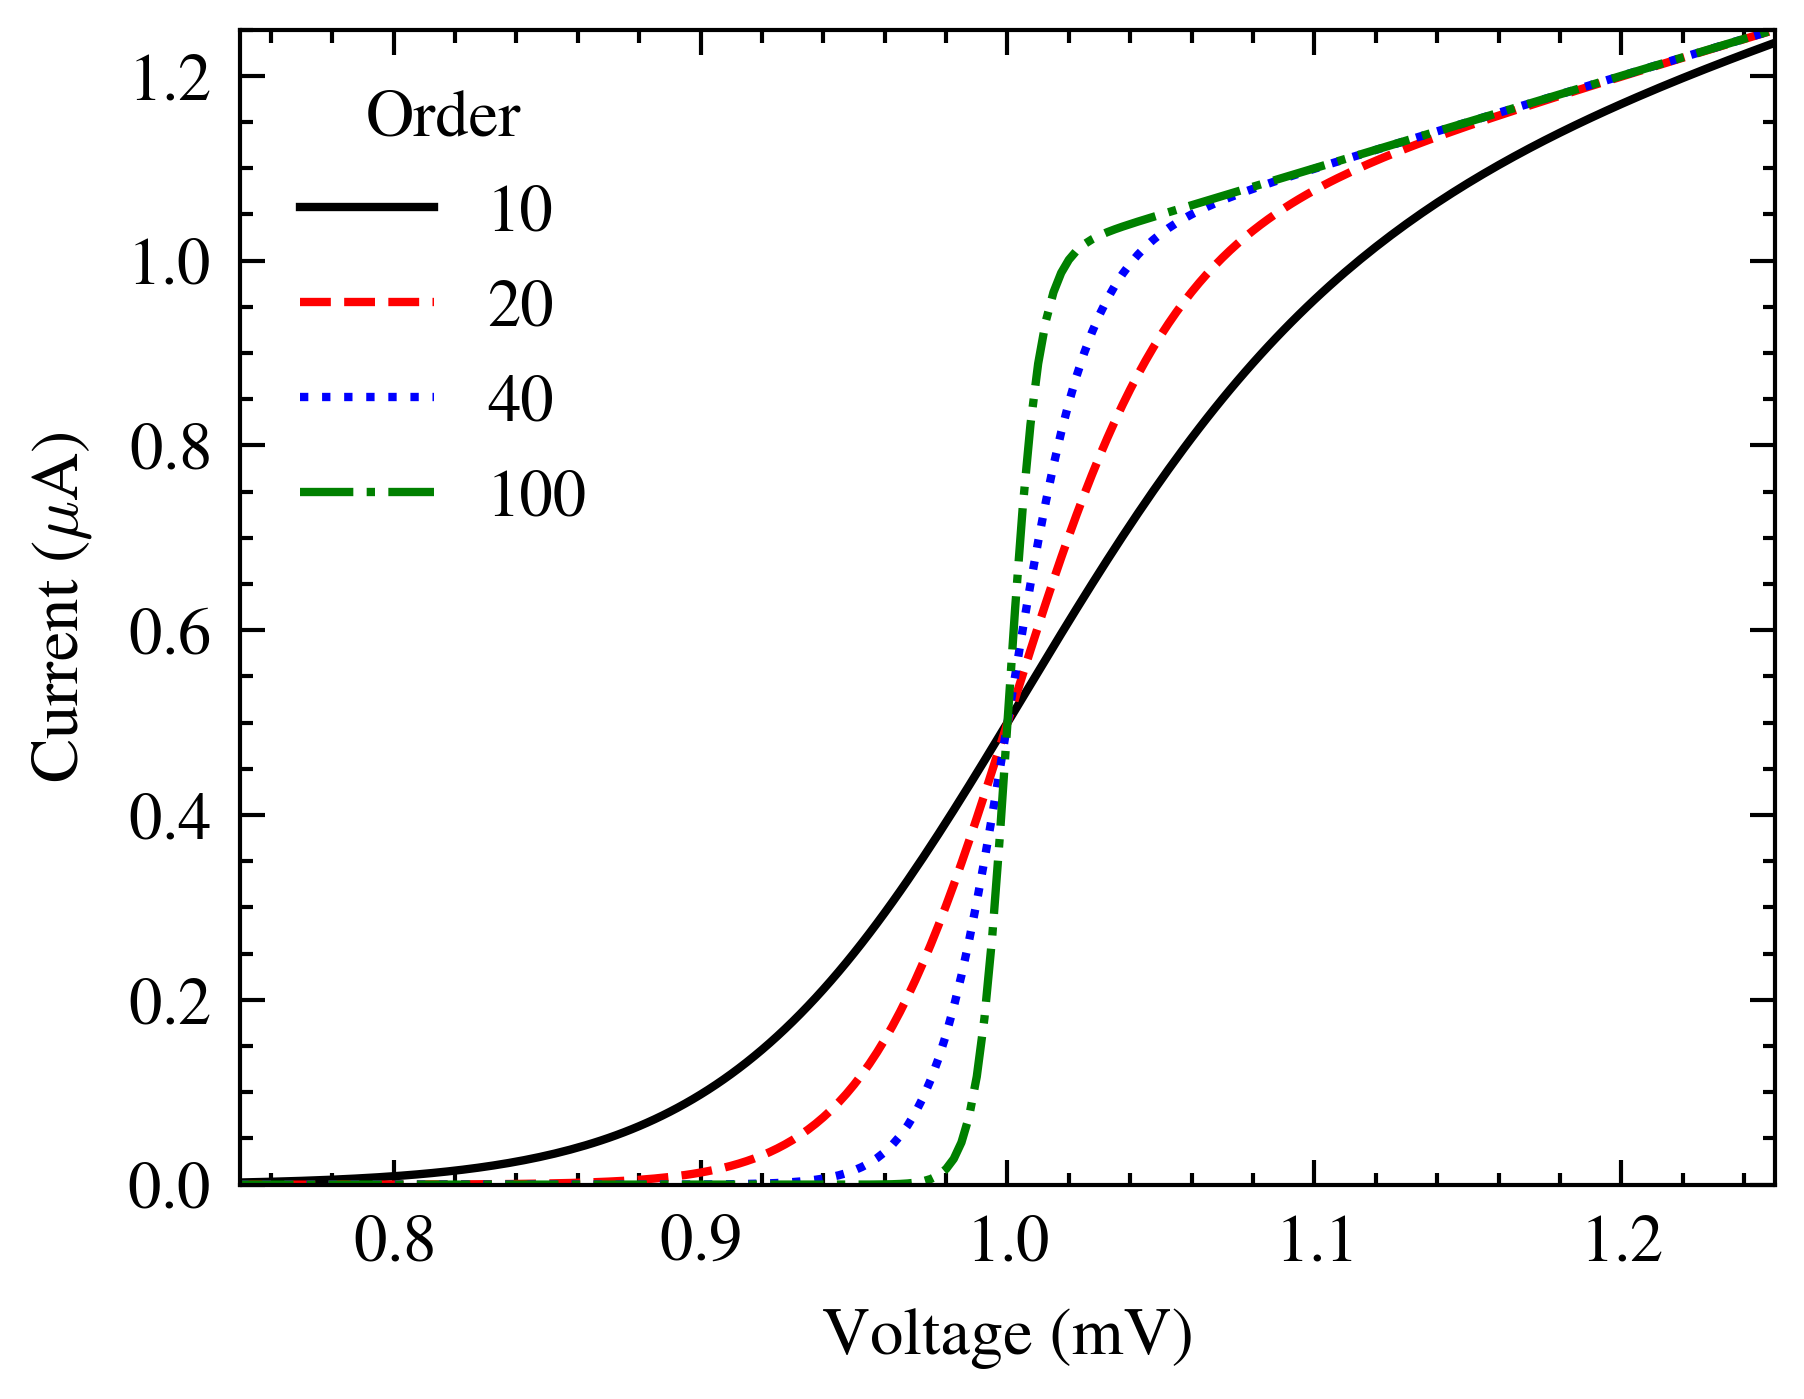

In [26]:
# Styles 'science', 'ieee'
with plt.style.context(["science", "ieee","no-latex"]):
    fig, ax = plt.subplots()
    for p in [10, 20, 40, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title="Order")
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig("fig02.jpg", dpi=300)
    plt.show()
    plt.close()

## Exercises (submit in your own copy)
1. Create `alpha = np.linspace(-5, 15, 21)` and compute `CL = 0.1*alpha`. Plot `CL` vs `alpha`.
2. Create `V = np.linspace(0, 120, 61)`. Use masking to select `V > 60`.
3. Use altitude-dependent density: \(\rho(h) = 1.225\exp(-h/8000)\).  
   Create `h = np.linspace(0, 12000, 121)` and plot `rho(h)`.
4. Compute dynamic pressure `q(h)` using `V=70 m/s` and the density model above; plot `q(h)`.
5. (Challenge) Create a 2D grid using `np.meshgrid` and plot contours of `Z = sin(X)*cos(Y)`.
6. Make plots using SciencePlots.